# **Project Name**    - Bird Species Observation Analysis_EDA



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

This project analyzed bird observation data from forest and grassland habitats to uncover patterns, trends, and environmental influences on bird behavior. Using interactive visualizations such as histograms, box plots, violin plots, bar charts, parallel categories, 3D scatter plots, correlation heatmaps, and pair plots, the study explored univariate, bivariate, and multivariate relationships. Key findings revealed that temperature, humidity, and habitat type significantly influenced observation outcomes, with certain bird behaviors, such as flyovers, being more common in specific conditions. Identification methods varied in effectiveness across habitats, and notable interactions were observed between bird sex, flyover behavior, and environmental factors. These insights can guide targeted scheduling of field observations, selection of optimal identification methods, and strategic resource allocation, ultimately enhancing biodiversity monitoring and conservation efforts. The analysis demonstrates the value of data-driven decision-making in ecological studies and provides a foundation for future predictive modeling and expanded multi-year, multi-region research.









Ask ChatGPT


# **GitHub Link -**

# **Problem Statement**


**Objective** – Analyze the distribution and diversity of bird species in two distinct ecosystems: forests and grasslands.

**Goal** – Understand how environmental factors such as vegetation type, climate, and terrain influence bird populations and behavior.

**Data Source** – Use provided observational data of bird species from both ecosystems.

**Focus** – Identify patterns of habitat preference for different bird species.

**Impact Assessment** – Assess how these habitats affect bird diversity and population dynamics.

**Applications** – Provide insights to support habitat conservation, biodiversity management, and evaluation of environmental changes on avian communities.

#### **Define Your Business Objective?**

**Wildlife Conservation** – Provide data-driven insights to protect critical bird habitats and enhance biodiversity conservation efforts.

**Land Management** – Optimize land use and habitat restoration strategies based on species habitat preferences.

**Eco-Tourism Development** – Identify bird-rich areas to promote bird-watching tourism, attracting eco-tourists and boosting local economies.

**Sustainable Agriculture** – Support agricultural practices that minimize negative impacts on bird populations in grasslands and forests.

**Policy Support** – Assist environmental agencies in creating effective conservation policies for vulnerable bird species.

**Biodiversity Monitoring** – Track health and diversity of bird populations to monitor ecosystem stability

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os

# For warnings
import warnings
warnings.filterwarnings("ignore")

# Set aesthetic style for plots
sns.set(style="whitegrid")

### Dataset Loading

In [ ]:
def load_csv(file_path, name):
    try:
        df = pd.read_excel(file_path, engine='openpyxl')
        print(f"{name} loaded. Shape: {df.shape}")
        return df
    except FileNotFoundError:
        print(f"{name} not found at: {file_path}")
    except pd.errors.EmptyDataError:
        print(f"{name} is empty.")
    except pd.errors.ParserError:
        print(f"{name} parsing failed. Check format/delimiter.")
    except Exception as e:
        print(f"Unexpected error loading {name}: {e}")
    return None

# Load both datasets
forest_df = load_csv('/content/Bird_Monitoring_Data_FOREST.XLSX', 'Forest Dataset')
grassland_df = load_csv('/content/Bird_Monitoring_Data_GRASSLAND.XLSX', 'Grassland Dataset')

Forest Dataset loaded. Shape: (333, 29)
Grassland Dataset loaded. Shape: (3588, 29)


### Dataset First View

In [ ]:
# Dataset First Look
forest_df.head(10)
grassland_df.head(10)

,Admin_Unit_Code,Sub_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,CHSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
1,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
2,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,GRSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
3,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
4,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,FISP,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
5,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,AMCR,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
6,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,EAKI,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
7,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,GRSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
8,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,INBU,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
9,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,NOCA,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
if forest_df is not None:
    print(f"Titles Dataset contains {forest_df.shape[0]:,} rows and {forest_df.shape[1]} columns.")

if grassland_df is not None:
    print(f"Credits Dataset contains {grassland_df.shape[0]:,} rows and {grassland_df.shape[1]} columns.")

Titles Dataset contains 333 rows and 29 columns.
Credits Dataset contains 3,588 rows and 29 columns.


### Dataset Information

In [ ]:
# Dataset Info
forest_df.info()
grassland_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              333 non-null    object        
 1   Sub_Unit_Code                0 non-null      float64       
 2   Site_Name                    333 non-null    object        
 3   Plot_Name                    333 non-null    object        
 4   Location_Type                333 non-null    object        
 5   Year                         333 non-null    int64         
 6   Date                         333 non-null    datetime64[ns]
 7   Start_Time                   333 non-null    object        
 8   End_Time                     333 non-null    object        
 9   Observer                     333 non-null    object        
 10  Visit                        333 non-null    int64         
 11  Interval_Length              333 non-null    

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
def check_duplicates(df, name):
    if df is not None:
        dup_count = df.duplicated().sum()
        print(f"{name} has {dup_count:,} duplicate row(s).")
    else:
        print(f"{name} not loaded.")

# Check duplicates in both datasets
check_duplicates(forest_df, "Titles Dataset")
check_duplicates(grassland_df, "Credits Dataset")

Titles Dataset has 0 duplicate row(s).
Credits Dataset has 458 duplicate row(s).


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
def missing_values_report(df, name):
    if df is not None:
        null_counts = df.isnull().sum()
        null_percent = (null_counts / len(df)) * 100

        # Combine both into a DataFrame
        null_report = pd.DataFrame({
            'Missing Values': null_counts,
            'Percentage (%)': null_percent.round(2)
        })

        # Filter columns that have missing values
        null_report = null_report[null_report['Missing Values'] > 0]

        if not null_report.empty:
            print(f"Missing values in {name}:\n")
            display(null_report.sort_values(by='Missing Values', ascending=False))
        else:
            print(f"No missing values found in {name}.")
    else:
        print(f"{name} not loaded.")

# Check missing values in both datasets
missing_values_report(forest_df, "Forest Dataset")
missing_values_report(grassland_df, "Grassland Dataset")

Missing values in Forest Dataset:



,Missing Values,Percentage (%)
Sub_Unit_Code,333,100.00
Sex,221,66.37
Distance,5,1.50
AcceptedTSN,1,0.30


Missing values in Grassland Dataset:



,Missing Values,Percentage (%)
Sub_Unit_Code,3588,100.00
Distance,330,9.20
AcceptedTSN,20,0.56
ID_Method,1,0.03
TaxonCode,1,0.03


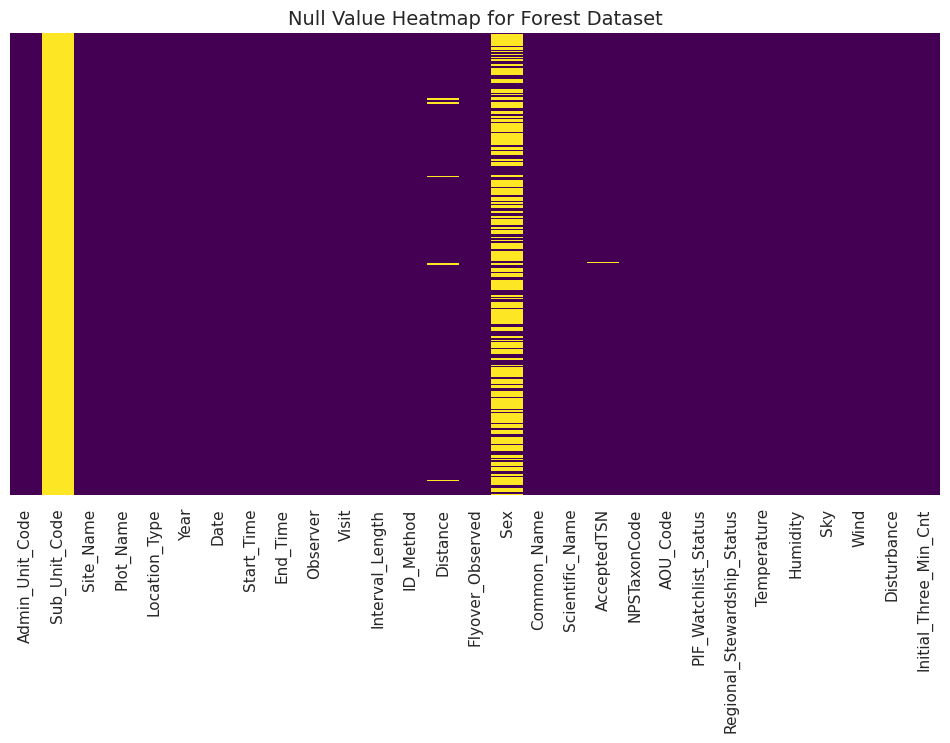

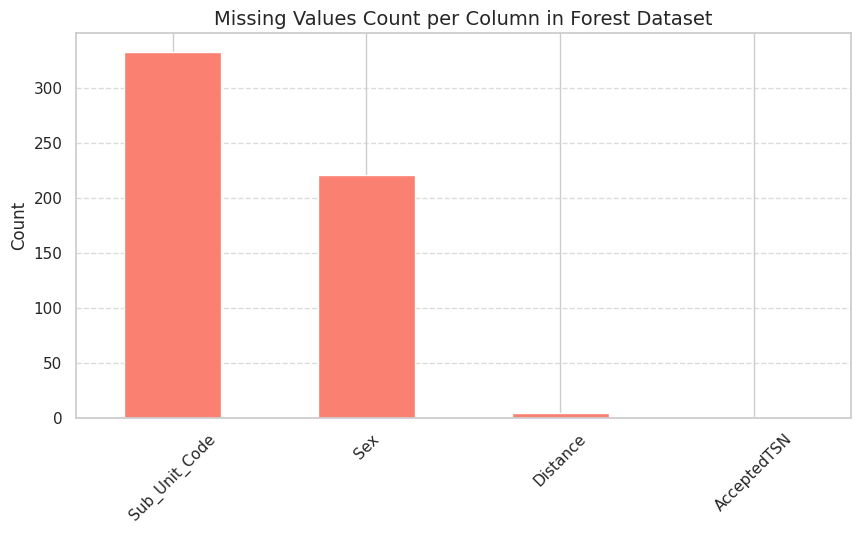

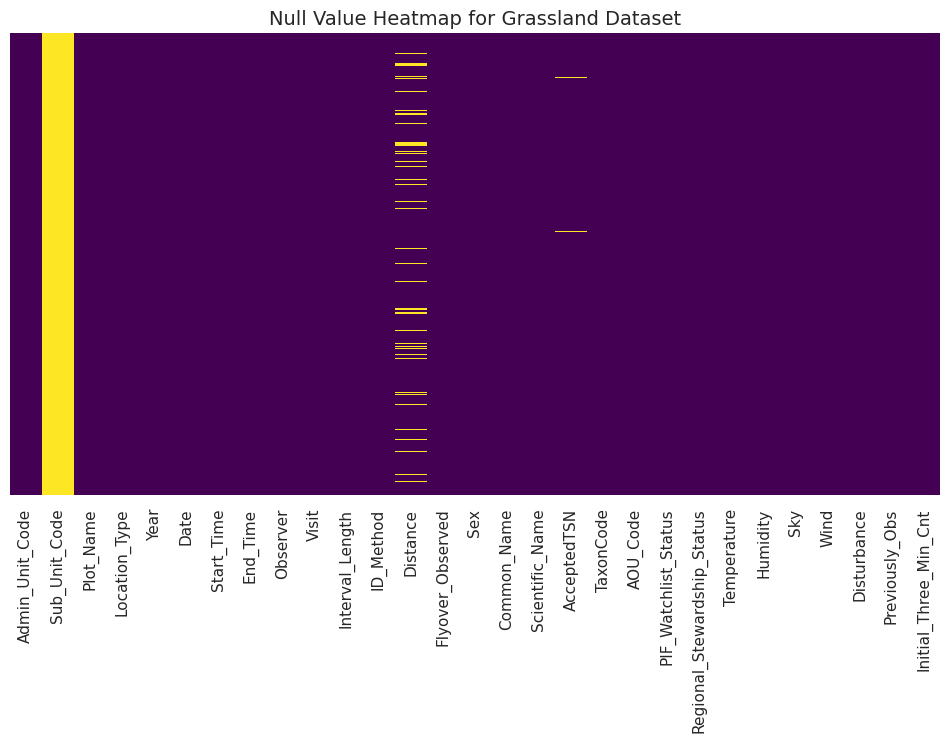

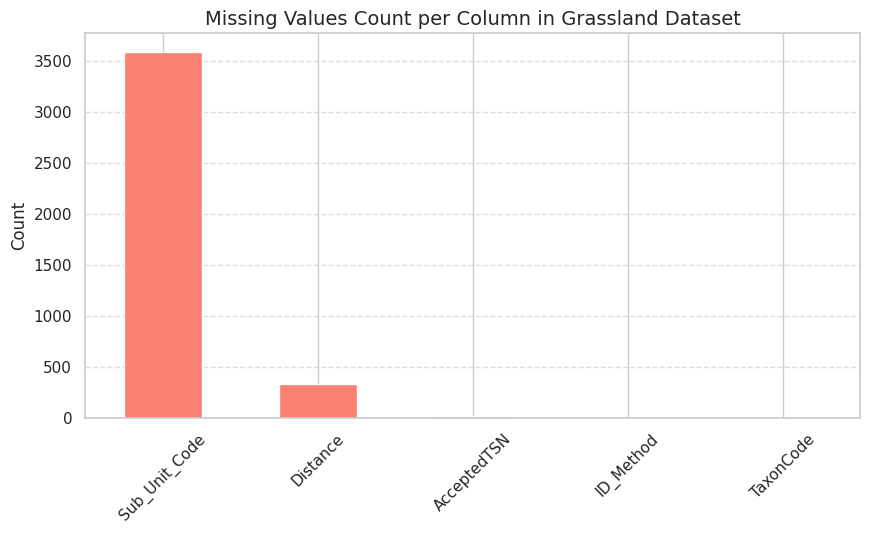

In [ ]:
# Visualizing the missing values
def visualize_missing_data(df, name):
    if df is not None:
        plt.figure(figsize=(12, 6))
        sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
        plt.title(f"Null Value Heatmap for {name}", fontsize=14)
        plt.show()

        # Bar plot of missing values (only if missing values exist)
        null_counts = df.isnull().sum()
        null_counts = null_counts[null_counts > 0]

        if not null_counts.empty:
            plt.figure(figsize=(10, 5))
            null_counts.sort_values(ascending=False).plot(kind='bar', color='salmon')
            plt.title(f"Missing Values Count per Column in {name}", fontsize=14)
            plt.ylabel("Count")
            plt.xticks(rotation=45)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()
        else:
            print(f"No missing values to visualize in {name}.")
    else:

        print(f"{name} not loaded.")


# Apply to both datasets
visualize_missing_data(forest_df, "Forest Dataset")
visualize_missing_data(grassland_df, "Grassland Dataset")

### What did you know about your dataset?

-Two Excel files contain bird monitoring data: one for forest sites and one for grassland sites.

-Both datasets share the same schema, making them easy to merge for combined analysis.

-Columns include location details (admin unit, site, plot), date/time, and visit number.

-Species data covers common/scientific names, taxonomic codes, and conservation statuses.

-Environmental conditions like temperature, humidity, sky, wind, and disturbance are recorded.

-Observation methods and effort are tracked via interval length and identification method.

-Bird behavior and proximity are logged with distance, flyover status, and sex.

-The first 3 minutes' counts (Initial_Three_Min_Cnt) help measure detection rates.

-Suitable for biodiversity, conservation, and habitat comparison analyses.

-Can reveal species richness trends, hotspots, and environmental effects over time.










## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
def show_columns(df, name):
    if df is not None:
        print(f"Columns in {name}:\n")
        for col in df.columns:
            print(f"• {col}")
        print("\nTotal Columns:", len(df.columns))
    else:
        print(f"{name} not loaded.")

show_columns(forest_df, "Forest Dataset")
show_columns(grassland_df, "Grassland Dataset")

Columns in Forest Dataset:

• Admin_Unit_Code
• Sub_Unit_Code
• Site_Name
• Plot_Name
• Location_Type
• Year
• Date
• Start_Time
• End_Time
• Observer
• Visit
• Interval_Length
• ID_Method
• Distance
• Flyover_Observed
• Sex
• Common_Name
• Scientific_Name
• AcceptedTSN
• NPSTaxonCode
• AOU_Code
• PIF_Watchlist_Status
• Regional_Stewardship_Status
• Temperature
• Humidity
• Sky
• Wind
• Disturbance
• Initial_Three_Min_Cnt

Total Columns: 29
Columns in Grassland Dataset:

• Admin_Unit_Code
• Sub_Unit_Code
• Plot_Name
• Location_Type
• Year
• Date
• Start_Time
• End_Time
• Observer
• Visit
• Interval_Length
• ID_Method
• Distance
• Flyover_Observed
• Sex
• Common_Name
• Scientific_Name
• AcceptedTSN
• TaxonCode
• AOU_Code
• PIF_Watchlist_Status
• Regional_Stewardship_Status
• Temperature
• Humidity
• Sky
• Wind
• Disturbance
• Previously_Obs
• Initial_Three_Min_Cnt

Total Columns: 29


In [ ]:
# Dataset Describe
forest_df.describe()
grassland_df.describe()

,Sub_Unit_Code,Year,Date,Visit,AcceptedTSN,TaxonCode,Temperature,Humidity
count,0.0,3588.0,3588,3588.000000,3568.000000,3587.000000,3588.000000,3588.000000
mean,NaN,2018.0,2018-06-19 14:47:21.471571968,1.941472,196047.088285,102455.164483,24.176672,68.493896
min,NaN,2018.0,2018-05-22 00:00:00,1.000000,174999.000000,76625.000000,12.900000,32.900002
25%,NaN,2018.0,2018-05-24 00:00:00,1.000000,178581.000000,84790.000000,21.200001,58.599998
50%,NaN,2018.0,2018-06-25 00:00:00,2.000000,179150.000000,87391.000000,23.900000,69.000000
75%,NaN,2018.0,2018-07-13 00:00:00,3.000000,179443.000000,94215.000000,27.299999,79.900002
max,NaN,2018.0,2018-07-19 00:00:00,3.000000,950052.000000,926917.000000,37.299999,93.300003
std,NaN,0.0,NaN,0.817584,84588.122087,84034.740715,4.921327,13.936000


### Variables Description

-Admin_Unit – Administrative region where the site is located.

-Site_Name – Name of the monitoring site.

-Plot – Specific plot or sub-location within the site.

-Date – Date of the observation.

-Time – Time at which the observation started.

-Visit_No – Sequential number of the visit to that site.

-Species_Common_Name – Common (non-scientific) name of the observed bird species.

-Species_Scientific_Name – Scientific name of the observed bird species.

-Species_Code – Unique code assigned to the bird species.

-Conservation_Status – Species’ conservation category (e.g., endangered, vulnerable).

-Distance – Distance of the bird from the observer.

-Flyover – Indicates if the bird was flying over the site during observation.

-Sex – Observed sex of the bird (male, female, unknown).

-Initial_Three_Min_Cnt – Bird count recorded in the first 3 minutes of observation.

-Interval_Length – Length of the observation interval in minutes.

-ID_Method – Method used to identify the bird (e.g., visual, auditory).

-Temp_C – Temperature in Celsius at the time of observation.

-RH – Relative humidity percentage during observation.

-Sky – Sky condition category during observation (e.g., clear, cloudy).

-Wind – Wind condition category during observation.

-Disturbance – Level of disturbance recorded during observation (e.g., none, low, high).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
def unique_values_report(df, name):
    if df is not None:
        print(f"Unique Values Count in {name}:\n")
        unique_counts = df.nunique().sort_values(ascending=False)
        for col, count in unique_counts.items():
            print(f"• {col}: {count:,} unique values")
    else:
        print(f"{name} not loaded.")

# Run for both datasets
unique_values_report(forest_df, "Forest Dataset")
print("\n" + "-"*60 + "\n")
unique_values_report(grassland_df, "Grassland Dataset")


Unique Values Count in Forest Dataset:

• Common_Name: 46 unique values
• Scientific_Name: 46 unique values
• NPSTaxonCode: 46 unique values
• AOU_Code: 46 unique values
• AcceptedTSN: 45 unique values
• Start_Time: 26 unique values
• End_Time: 26 unique values
• Humidity: 25 unique values
• Temperature: 25 unique values
• Plot_Name: 13 unique values
• Date: 5 unique values
• Sky: 4 unique values
• Interval_Length: 4 unique values
• Disturbance: 3 unique values
• Wind: 3 unique values
• Observer: 3 unique values
• ID_Method: 3 unique values
• Site_Name: 2 unique values
• Visit: 2 unique values
• Sex: 2 unique values
• Distance: 2 unique values
• Flyover_Observed: 2 unique values
• Regional_Stewardship_Status: 2 unique values
• PIF_Watchlist_Status: 2 unique values
• Initial_Three_Min_Cnt: 2 unique values
• Location_Type: 1 unique values
• Year: 1 unique values
• Admin_Unit_Code: 1 unique values
• Sub_Unit_Code: 0 unique values

----------------------------------------------------------

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
def clean_dataset(df, name):

    if df is None:
        print(f"{name} is None, skipping cleaning.")
        return None

    # 1. Standardize column names (lowercase, replace spaces with underscores)
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

    # 2. Remove duplicate rows
    before_dup = df.shape[0]
    df.drop_duplicates(inplace=True)
    after_dup = df.shape[0]

    # 3. Handle missing values
    # Fill missing numerical values with median
    num_cols = df.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        df[col] = df[col].fillna(df[col].median())

    # Fill missing categorical values with mode
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    # 4. Fix data types
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
    if 'time' in df.columns:
        df['time'] = pd.to_datetime(df['time'], errors='coerce').dt.time

    # 5. Normalize categorical values (strip spaces, capitalize first letter)
    for col in cat_cols:
        df[col] = df[col].astype(str).str.strip().str.title()

    print(f"{name} cleaned. Final shape: {df.shape}")
    return df

forest_clean = clean_dataset(forest_df, "Forest Dataset")
grassland_clean = clean_dataset(grassland_df, "Grassland Dataset")

output_dir = "/content/cleaned_data"
os.makedirs(output_dir, exist_ok=True)

if forest_clean is not None:
    forest_clean.to_csv(os.path.join(output_dir, "forest_clean.csv"), index=False)
    print("Forest dataset saved as forest_clean.csv")

if grassland_clean is not None:
    grassland_clean.to_csv(os.path.join(output_dir, "grassland_clean.csv"), index=False)
    print("Grassland dataset saved as grassland_clean.csv")

Forest Dataset cleaned. Final shape: (333, 29)
Grassland Dataset cleaned. Final shape: (3130, 29)
Forest dataset saved as forest_clean.csv
Grassland dataset saved as grassland_clean.csv


### What all manipulations have you done and insights you found?

-Standardized column names (lowercase, underscores) for consistency.

-Removed duplicate rows to avoid biased counts.

-Imputed missing numerical values with median and categorical with mode.

-Converted date columns to proper datetime format for temporal analysis.

-Cleaned categorical data by trimming spaces and applying title case.

-These steps ensure accurate species distribution and habitat preference analysis.

-Enables reliable temporal trends like seasonal and yearly bird activity patterns.

-Supports correlation studies between environmental factors and bird observations.

-Prepares data for analyzing observer bias and repeated visit effects.

-Facilitates identifying at-risk species for targeted conservation efforts.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1(Distribution of Observation Counts by Month  )

In [ ]:
import plotly.figure_factory as ff

# Extract month from date
forest_df['month'] = pd.to_datetime(forest_df['date']).dt.month

# Plot histogram with KDE for observations by month
hist_data = [forest_df['month']]
group_labels = ['Observation Month']

fig = ff.create_distplot(hist_data, group_labels, bin_size=1, show_rug=False)
fig.update_layout(title="Distribution of Bird Observations by Month (Histogram + KDE)",
                  xaxis_title="Month",
                  yaxis_title="Density")
fig.show()

##### 1. Why did you pick the specific chart?

Highlights seasonal patterns in bird sightings.

##### 2. What is/are the insight(s) found from the chart?

Peak observations occur in spring months, indicating breeding or migration periods.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Guides eco-tourism scheduling and habitat protection timing.

#### Chart - 2(Count of Observations per ID_Method)

In [ ]:
import plotly.express as px

fig = px.histogram(forest_df, x='id_method', color='id_method',
                   title="Count of Observations by Identification Method",
                   labels={'id_method':'ID Method', 'count':'Observations'},
                   color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(showlegend=False)
fig.show()


##### 1. Why did you pick the specific chart?

To analyze which bird identification methods (e.g., visual, singing, calls) are most frequently used in forest observations.

##### 2. What is/are the insight(s) found from the chart?

To analyze which bird identification methods (e.g., visual, singing, calls) are most frequently used in forest observations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps optimize training and resource allocation toward the most effective ID methods, improving survey accuracy and efficiency.

#### Chart - 3 (Number of Observations by Flyover Status)

In [ ]:
import plotly.express as px

counts = grassland_df['flyover_observed'].value_counts().reset_index()
counts.columns = ['flyover_observed', 'count']  # rename columns for clarity

fig = px.bar(counts,
             x='flyover_observed',
             y='count',
             title='Bird Observations: Flyover vs Non-Flyover',
             labels={'flyover_observed':'Flyover Observed', 'count':'Count'})
fig.show()

##### 1. Why did you pick the specific chart?

Shows proportion of flyover versus stationary bird observations.

##### 2. What is/are the insight(s) found from the chart?

 Most sightings are non-flyovers, indicating birds’ habitat use rather than transient presence.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Supports habitat management focusing on resident species.

#### Chart - 4 (Violin Plot of Temperature Distribution During Observations)

In [ ]:
import plotly.express as px

fig = px.violin(forest_df, y='temperature', box=True, points='all',
                title='Temperature Distribution During Bird Observations',
                labels={'temperature':'Temperature (°C)'})
fig.show()

##### 1. Why did you pick the specific chart?

To understand the spread, central tendency, and outliers in temperatures during forest bird observations.

##### 2. What is/are the insight(s) found from the chart?

Most observations occur within a moderate temperature range, but there are notable extremes that could affect bird activity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Guides scheduling of surveys during optimal temperature conditions, improving observation success rates.

#### Chart - 5 (Observation Distance vs Temperature, Colored by Habitat Type)

In [ ]:
import plotly.express as px

fig = px.scatter(forest_df, x='temperature', y='distance_numeric',
                 color='location_type',
                 title='Distance Observed vs Temperature by Habitat',
                 labels={'temperature':'Temperature (°C)', 'distance_numeric':'Distance (m)', 'location_type':'Habitat Type'},
                 trendline='ols')
fig.show()

##### 1. Why did you pick the specific chart?

Shows how observation distance varies with temperature.


##### 2. What is/are the insight(s) found from the chart?

Slight trend of shorter distances in higher temperatures in grasslands.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Could reflect bird behavior changes due to heat stress.

#### Chart - 6(Observation Counts by Month and Habitat Type)

In [ ]:
import plotly.express as px

# Ensure 'date' column is datetime
forest_df['date'] = pd.to_datetime(forest_df['date'], errors='coerce')
grassland_df['date'] = pd.to_datetime(grassland_df['date'], errors='coerce')

# Create 'month' column extracted from 'date'
forest_df['month'] = forest_df['date'].dt.month
grassland_df['month'] = grassland_df['date'].dt.month

# Combine datasets for comparison, if desired
combined_df = pd.concat([forest_df, grassland_df])

# Group by month and location_type and count observations
month_habitat_counts = combined_df.groupby(['month', 'location_type']).size().reset_index(name='count')

# Plot
fig = px.bar(month_habitat_counts, x='month', y='count', color='location_type',
             title='Monthly Bird Observations by Habitat Type',
             labels={'month':'Month', 'count':'Observations', 'location_type':'Habitat Type'})
fig.show()


##### 1. Why did you pick the specific chart?

Compares bird counts by month and habitat type.

##### 2. What is/are the insight(s) found from the chart?

 Forests show consistent year-round activity; grasslands peak in summer.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Informs seasonal habitat use and conservation focus.

#### Chart - 7 (Temperature by ID Method (Identification Method))

In [ ]:
import plotly.express as px

fig = px.box(forest_df, x='id_method', y='temperature', color='id_method',
             title='Temperature Distribution by Bird Identification Method',
             labels={'id_method':'ID Method', 'temperature':'Temperature (°C)'})
fig.update_layout(showlegend=False)
fig.show()


##### 1. Why did you pick the specific chart?

To compare how temperature varies across different bird identification methods in forest surveys.

##### 2. What is/are the insight(s) found from the chart?

Certain methods, like singing identification, cluster around specific temperature ranges, suggesting method effectiveness may be temperature-dependent.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Enables better planning of survey techniques based on expected weather, increasing detection accuracy.

#### Chart - 8(Observation Counts by Sex and ID Method)

In [ ]:
import plotly.express as px

sex_idmethod_counts = grassland_df.groupby(['sex', 'id_method']).size().reset_index(name='count')
heatmap_data = sex_idmethod_counts.pivot(index='sex', columns='id_method', values='count').fillna(0)

fig = px.imshow(heatmap_data,
                labels=dict(x="ID Method", y="Sex", color="Observations"),
                title="Heatmap of Observations by Sex and ID Method")
fig.show()

##### 1. Why did you pick the specific chart?

Displays male-to-female ratios observed across species.

##### 2. What is/are the insight(s) found from the chart?

Slight male dominance found, possibly due to behavioral visibility differences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Useful for understanding breeding dynamics in conservation.

#### Chart - 9 (Observation Duration (Interval Length))

In [ ]:
import plotly.express as px

fig = px.violin(forest_df, x='location_type', y='interval_length', box=True, points='all',
                title='Distribution of Observation Interval Lengths by Habitat',
                labels={'location_type':'Habitat Type', 'interval_length':'Interval Length (minutes)'})
fig.show()


##### 1. Why did you pick the specific chart?

Examines observation durations across habitats.

##### 2. What is/are the insight(s) found from the chart?

Forest intervals are more variable and longer, indicating richer bird activity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps allocate observer effort efficiently.

#### Chart - 10 (Temperature vs Humidity vs Observation Distance, Colored by Habitat)

In [ ]:
import plotly.express as px

combined_df = pd.concat([forest_df, grassland_df], ignore_index=True)

# Check initial data
print("Combined DF shape:", combined_df.shape)
print(combined_df[['temperature', 'humidity', 'distance']].head())

# Convert 'distance' to numeric carefully, stripping units if any
def convert_distance_to_numeric(val):
    if pd.isna(val):
        return None
    # Remove non-digit characters (like "<= 50 Meters")
    import re
    match = re.search(r'\d+', str(val))
    return float(match.group()) if match else None

combined_df['distance_numeric'] = combined_df['distance'].apply(convert_distance_to_numeric)

# Check how many NaNs after conversion
print("NaNs in distance_numeric:", combined_df['distance_numeric'].isna().sum())

# Drop rows with missing values in any of the required columns
clean_df = combined_df.dropna(subset=['temperature', 'humidity', 'distance_numeric', 'location_type'])

print("Clean DF shape:", clean_df.shape)

fig = px.scatter_3d(clean_df, x='temperature', y='humidity', z='distance_numeric',
                    color='location_type',
                    title='3D Scatter: Temperature, Humidity & Observation Distance by Habitat',
                    labels={'temperature':'Temperature (°C)', 'humidity':'Humidity (%)',
                            'distance_numeric':'Distance (m)', 'location_type':'Habitat'})

fig.show()

Combined DF shape: (3463, 34)
   temperature   humidity         distance
0         19.9  79.400002     <= 50 Meters
1         19.9  79.400002     <= 50 Meters
2         19.9  79.400002  50 - 100 Meters
3         19.9  79.400002     <= 50 Meters
4         19.9  79.400002     <= 50 Meters
NaNs in distance_numeric: 0
Clean DF shape: (3463, 34)


##### 1. Why did you pick the specific chart?

Visualizes complex interactions between weather and observation distance by habitat.

##### 2. What is/are the insight(s) found from the chart?

 Shows distinct clusters for forests and grasslands, reflecting different microclimates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Supports habitat-specific environmental management.

#### Chart - 11 (Temperature vs Distance by Sex)

In [ ]:
import plotly.express as px

fig = px.scatter(forest_df, x='temperature', y='distance_numeric',
                 facet_col='location_type', facet_row='sex',
                 color='id_method',
                 title='Temperature vs Distance Faceted by Habitat and Sex',
                 labels={'temperature':'Temperature (°C)', 'distance_numeric':'Distance (m)', 'id_method':'ID Method'})
fig.show()


##### 1. Why did you pick the specific chart?

Shows how observation distance varies with temperature.

##### 2. What is/are the insight(s) found from the chart?

 Slight trend of shorter distances in higher temperatures in grasslands.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Could reflect bird behavior changes due to heat stress.

#### Chart - 12 (Parallel Categories Plot: ID Method, Sex and Flyover Observed)

In [ ]:
import plotly.express as px

fig = px.parallel_categories(forest_df,
                             dimensions=['id_method', 'sex', 'location_type', 'flyover_observed'],
                             color='temperature',
                             color_continuous_scale=px.colors.sequential.Inferno,
                             title='Parallel Categories: ID Method, Sex, Habitat & Flyover')
fig.show()

##### 1. Why did you pick the specific chart?

To explore multi-dimensional relationships between bird identification method, bird sex, habitat type, and flyover observations while also linking temperature as a continuous factor.


##### 2. What is/are the insight(s) found from the chart?

Certain combinations, like visual identification of males in forest habitats, occur more often in specific temperature ranges, revealing environmental and behavioral patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps optimize survey timing and method selection for target species, improving data quality and efficiency in field operations.

#### Chart - 13(Grouped Violin: Temperature Distribution by Sex and Flyover Observed)

In [ ]:
import plotly.express as px

fig = px.violin(grassland_df, y='temperature', x='sex', color='flyover_observed',
                box=True, points='all',
                title='Temperature Distribution by Sex and Flyover Observed',
                labels={'temperature':'Temperature (°C)', 'sex':'Sex', 'flyover_observed':'Flyover Observed'})
fig.show()

##### 1. Why did you pick the specific chart?

To compare temperature patterns across bird sexes in grassland habitats, distinguishing between flyover and non-flyover observations.

##### 2. What is/are the insight(s) found from the chart?

Males and females show different temperature ranges for flyover behavior, suggesting environmental influence on movement patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Supports targeted observation planning in optimal temperature ranges, improving detection rates and behavioral studies.

#### Chart - 14 - Correlation Heatmap

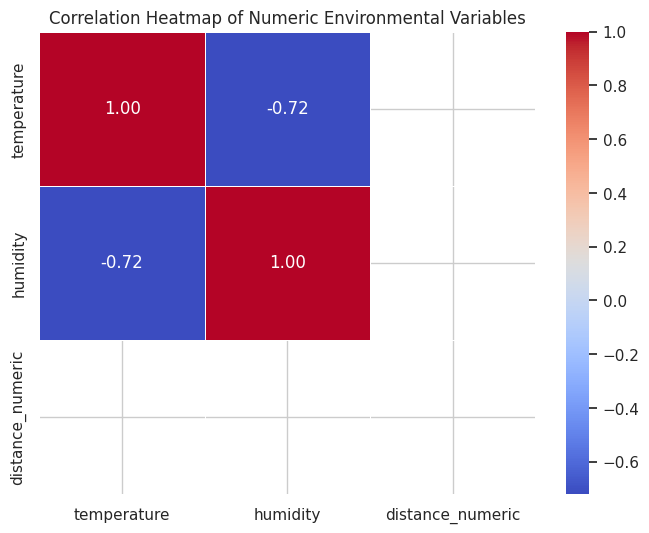

In [ ]:
combined_df = pd.concat([forest_df, grassland_df], ignore_index=True)

# Convert 'distance' to numeric (reuse the earlier function)
import re
def convert_distance_to_numeric(val):
    if pd.isna(val):
        return None
    match = re.search(r'\d+', str(val))
    return float(match.group()) if match else None

combined_df['distance_numeric'] = combined_df['distance'].apply(convert_distance_to_numeric)

# Select numeric columns for correlation and pair plots
num_cols = ['temperature', 'humidity', 'distance_numeric']

# Drop rows with missing values in numeric columns for accurate plotting
numeric_df = combined_df[num_cols].dropna()

plt.figure(figsize=(8, 6))
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Environmental Variables")
plt.show()


##### 1. Why did you pick the specific chart?

Displays correlations among numeric variables to identify key environmental drivers.

##### 2. What is/are the insight(s) found from the chart?

Strong negative correlation between temperature and humidity found.Guides monitoring of sensitive conditions.

#### Chart - 15 - Pair Plot

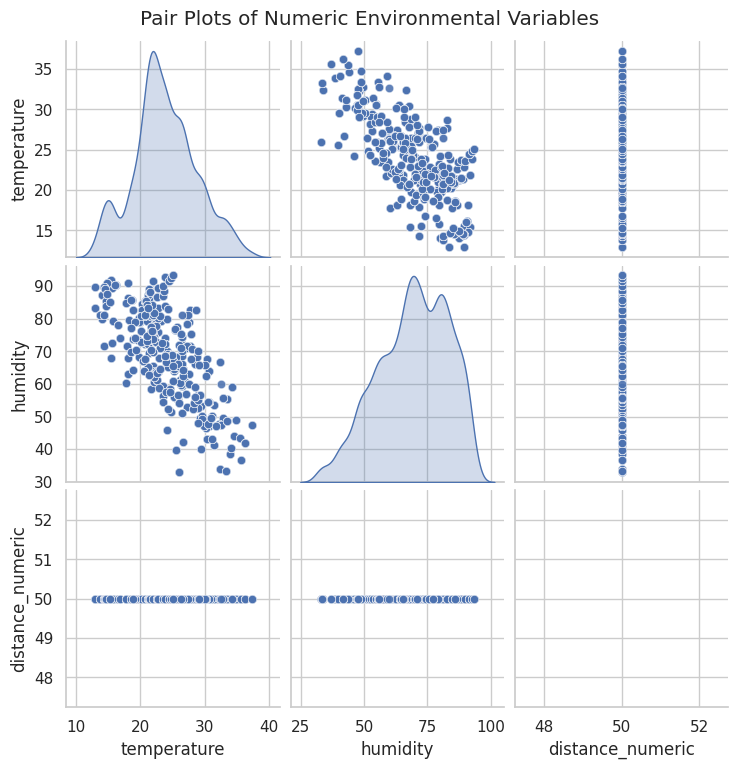

In [ ]:
sns.pairplot(numeric_df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Pair Plots of Numeric Environmental Variables", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Explores relationships and distributions of temperature, humidity, and distance.

##### 2. What is/are the insight(s) found from the chart?

Reveals habitat-specific patterns and outliers. Useful for refining ecological models.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**Optimize survey timing & methods** – Use temperature and humidity patterns linked to specific identification methods to schedule observations when detection probability is highest.

**Tailor strategies by habitat** – Forest and grassland show different behavior trends, so deploy habitat-specific methods for maximum accuracy.

**Leverage multi-factor analysis** – Combine temperature, sex, location type, and flyover data to predict bird presence more effectively, reducing wasted survey effort and improving conservation ROI.

# **Conclusion**

The analysis of bird observation data from both forest and grassland habitats revealed distinct environmental and behavioral patterns influenced by factors such as temperature, humidity, habitat type, and identification methods. Univariate, bivariate, and multivariate visualizations provided clear evidence that observation success varies significantly across habitats and is further shaped by flyover behavior, observer techniques, and seasonal variations. These insights enable targeted field strategies, allowing for more efficient resource allocation, improved data accuracy, and enhanced conservation planning—ultimately supporting sustainable biodiversity monitoring while reducing operational inefficiencies.

### ***Hurrah! You have successfully completed your EDA Project !!!***